In [1]:
#IMPORT DATA USING LIBRARY PANDAS
import pandas as pd
data_train = pd.read_csv('D:/Materi Kuliah/Semester 9/NLP/proyek akhir/data_preprocessed.csv')

In [2]:
data_train

,Unnamed: 0,Unnamed: 0.1,title,label
0,0,8476,you can smell hillarys fear,FAKE
1,1,10294,watch the exact moment paul ryan committed pol...,FAKE
2,2,3608,kerry to go to paris in gesture of sympathy,REAL
3,3,10142,bernie supporters on twitter erupt in anger ag...,FAKE
4,4,875,the battle of new york why this primary matters,REAL
5,5,6903,tehran usa,FAKE
6,6,7341,girl horrified at what she watches boyfriend d...,FAKE
7,7,95,britains schindler dies at,REAL
8,8,4869,fact check trump and clinton at the commanderi...,REAL
9,9,2909,iran reportedly makes new push for uranium con...,REAL


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()


In [10]:
X_train_counts = count_vect.fit_transform((data_train.title).values.astype('U'))
print (X_train_counts.shape)
count_vect.vocabulary_

(6217, 10367)


{u'writings': 10284,
 u'sinjar': 8418,
 u'sowell': 8614,
 u'foul': 3680,
 u'four': 3686,
 u'jihad': 4903,
 u'hanging': 4114,
 u'cyprus': 2239,
 u'deport': 2453,
 u'disobeying': 2641,
 u'kommonsentsjane': 5099,
 u'isaid': 4809,
 u'electricity': 2961,
 u'protestants': 7210,
 u'antirussia': 436,
 u'digit': 2556,
 u'freeclimbers': 3723,
 u'kennels': 5017,
 u'regional': 7561,
 u'appropriation': 501,
 u'broward': 1224,
 u'bringing': 1196,
 u'reptilianhuman': 7675,
 u'prize': 7112,
 u'broiles': 1212,
 u'pointcounterpoint': 6886,
 u'wednesday': 10097,
 u'piling': 6797,
 u'lamestream': 5139,
 u'woods': 10236,
 u'judicial': 4960,
 u'path': 6656,
 u'romneys': 7893,
 u'reutersipsos': 7765,
 u'charter': 1556,
 u'nigh': 6180,
 u'tired': 9326,
 u'miller': 5788,
 u'bacon': 719,
 u'millet': 5789,
 u'tires': 9327,
 u'second': 8127,
 u'available': 670,
 u'loathing': 5374,
 u'newsbud': 6157,
 u'wilson': 10187,
 u'sesame': 8219,
 u'brexit': 1173,
 u'errors': 3114,
 u'ruthless': 7960,
 u'cooking': 2004,
 u'

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print (X_train_tfidf.shape)
print((tfidf_transformer.fit_transform(count_vect.fit_transform(data_train.title.astype('U').values)).toarray()))

(6217, 10367)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
y_emotion = data_train['label']

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score,recall_score, precision_recall_curve,roc_curve,auc,classification_report

data_X = X_train_tfidf
kf = KFold(n_splits=10)
for train, test in kf.split(data_X):
    #print("%s %s\n " % (train, test))
    X = X_train_tfidf
    y = y_emotion
    #print train
    print (test)
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    print(("Size of training set: {} size of test set: {}\n".format(X_train.shape, X_test.shape)))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [31]:
from sklearn.svm import SVC
best_scoreRBF = 0
for gamma in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
    for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        svm_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svm_rbf.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm_rbf.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (score)
        print (svm_rbf.score(X_train, y_train))
        predict = svm_rbf.predict(X_test)
        #print (svm_rbf.predict(X_test))
        
        
        mean = score
        params = {'C': C, 'gamma': gamma}
        predicted = predict
        print(("%0.3f for %r" % (mean, params)))

        if score > best_scoreRBF:
            best_scoreRBF = score
            best_parameters = {'C': C, 'gamma': gamma}
            best_predict = predicted

            print (("Accuracy:", accuracy_score(y_test, predicted)))
            print (("Precision:", precision_score(y_test, predicted, average='macro')))
            print (("Recall:", recall_score(y_test, predicted, average='macro')))
            print (("F1:", f1_score(y_test, predicted, average='macro')))
            evaluate = [accuracy_score(y_test, predicted),precision_score(y_test, predicted, average='macro'),recall_score(y_test, predicted, average='macro'),f1_score(y_test, predicted, average='macro')]

0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.01, 'gamma': 0.01}
('Accuracy:', 0.4750402576489533)
('Precision:', 0.23752012882447665)
('Recall:', 0.5)
('F1:', 0.3220524017467249)


C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.03, 'gamma': 0.01}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.04, 'gamma': 0.01}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.06, 'gamma': 0.01}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.09, 'gamma': 0.01}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.1, 'gamma': 0.01}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.3, 'gamma': 0.01}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.6, 'gamma': 0.01}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 1, 'gamma': 0.01}
0.8003220611916264
0.8398856325947105
0.800 for {'C': 3, 'gamma': 0.01}
('Accuracy:', 0.8003220611916264)
('Precision:', 0.8003630328804066)
('Recall:', 0.8011126130810025)
('F1:', 0.800205492247338)
0.7874396135265701
0.84578270192995
0.787 for {'C': 6, 'gamma': 0.01}
0.8003220611916264
0.8670478913509649
0.800 for {'C': 9, 'gamma': 0.01}
0.8035426731078905
0.8729449606862044
0.804 for {'C': 10, 'gamma

0.8164251207729468
1.0
0.816 for {'C': 6, 'gamma': 0.6}
0.8164251207729468
1.0
0.816 for {'C': 9, 'gamma': 0.6}
0.8164251207729468
1.0
0.816 for {'C': 10, 'gamma': 0.6}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.01, 'gamma': 1}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.03, 'gamma': 1}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.04, 'gamma': 1}
0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.06, 'gamma': 1}
0.47987117552334946
0.5189421015010722
0.480 for {'C': 0.09, 'gamma': 1}
0.4863123993558776
0.541458184417441
0.486 for {'C': 0.1, 'gamma': 1}
0.7987117552334944
0.929771265189421
0.799 for {'C': 0.3, 'gamma': 1}
0.8051529790660226
0.974446032880629
0.805 for {'C': 0.6, 'gamma': 1}
0.8260869565217391
0.9926733380986419
0.826 for {'C': 1, 'gamma': 1}
('Accuracy:', 0.8260869565217391)
('Precision:', 0.8278546166477201)
('Recall:', 0.8238795882291775)
('F1:', 0.824810883102771)
0.822866344605475
1.0
0.823 for {'C': 3, 'gamma': 1}
0.82286634

In [32]:
print("Best score: {:.2f}".format(best_scoreRBF))
print("Best parameters: {}".format(best_parameters))
print("Best predict: {}".format(best_predict))

Best score: 0.83
Best parameters: {'C': 3, 'gamma': 3}
Best predict: ['FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL'
 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL' 'REAL' 'FAKE' 'FAKE'
 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL'
 'REAL' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'REAL' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL'
 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL' 'REAL'
 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'REAL'
 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'REAL' 'FAKE'
 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE'
 'REAL' 'REAL' 'REAL' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL'
 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL'
 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE'
 'REAL' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL'
 'REAL' 

[[  6 320]
 [  0 295]]


Text(33,0.5,'True')

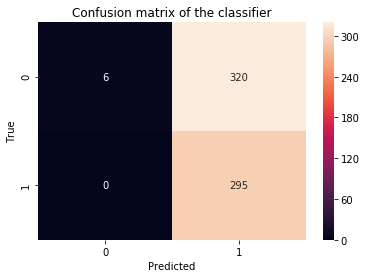

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, predict )
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [36]:
import numpy as np
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
print(classification_report(y_test, best_predict))


             precision    recall  f1-score   support

       FAKE       0.84      0.84      0.84       326
       REAL       0.82      0.82      0.82       295

avg / total       0.83      0.83      0.83       621



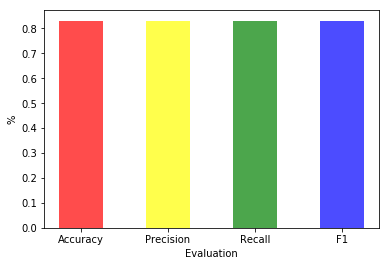

In [37]:
color = ['Red','Yellow','Green','Blue']
algo = ['Accuracy','Precision', 'Recall','F1']
fig = plt.figure()
plt.bar(np.arange(4), evaluate, color=color,bottom=0,alpha=0.7, width = 0.5,label=algo)
plt.xticks(np.arange(4), algo)
plt.ylabel('%')
plt.xlabel('Evaluation')
#plt.subplots_adjust(hspace = 0.5)
plt.show()

In [38]:
from sklearn.svm import SVC
best_scoreLNR = 0
for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        linearsvm = SVC(kernel='linear', C=C)
        linearsvm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = linearsvm.score(X_test, y_test)
        print (score)
        print (linearsvm.score(X_train, y_train))
        # if we got a better score, store the score and parameters
        #print (linearsvm.predict(X_test))
        predict = linearsvm.predict(X_test)
        
        mean = score
        params = {'C': C}
        predicted = predict
        print("%0.3f for %r" % (mean, params))
        
        if score > best_scoreLNR:
            best_scoreLNR = score
            best_parameters = {'C': C}
            best_predict = predicted
            
            print ("Accuracy:", accuracy_score(y_test, predicted))
            print ("Precision:", precision_score(y_test, predicted, average='macro'))
            print ("Recall:", recall_score(y_test, predicted, average='macro'))
            print ("F1:", f1_score(y_test, predicted, average='macro'))
            evaluate = [accuracy_score(y_test, predicted),precision_score(y_test, predicted, average='macro'),recall_score(y_test, predicted, average='macro'),f1_score(y_test, predicted, average='macro')]

0.4750402576489533
0.5091136526090064
0.475 for {'C': 0.01}
('Accuracy:', 0.4750402576489533)
('Precision:', 0.23752012882447665)
('Recall:', 0.5)
('F1:', 0.3220524017467249)
0.47987117552334946
0.5151894210150108
0.480 for {'C': 0.03}
('Accuracy:', 0.47987117552334946)
('Precision:', 0.738673139158576)
('Recall:', 0.504601226993865)
('F1:', 0.33222916534887825)
0.5523349436392915
0.6081129378127234
0.552 for {'C': 0.04}
('Accuracy:', 0.5523349436392915)
('Precision:', 0.7144453971948307)
('Recall:', 0.5728137672870958)
('F1:', 0.47601617132867136)
0.7938808373590982
0.839349535382416
0.794 for {'C': 0.06}
('Accuracy:', 0.7938808373590982)
('Precision:', 0.7936367974439305)
('Recall:', 0.7943329520640532)
('F1:', 0.7936877076411961)
0.7809983896940419
0.8398856325947105
0.781 for {'C': 0.09}
0.7809983896940419
0.8407791279485347
0.781 for {'C': 0.1}
0.8083735909822867
0.8965332380271622
0.808 for {'C': 0.3}
('Accuracy:', 0.8083735909822867)
('Precision:', 0.812089349125008)
('Recall:',

Text(0.5,0,'Evaluation')

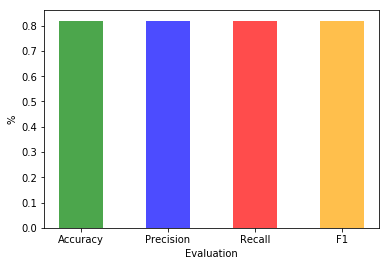

In [39]:
color = ['Green','Blue','Red','Orange']
algo = ['Accuracy','Precision', 'Recall','F1']
fig = plt.figure()
plt.bar(np.arange(4), evaluate, color=color,bottom=0,alpha=0.7, width = 0.5,label=algo)
plt.xticks(np.arange(4), algo)
plt.ylabel('%')
plt.xlabel('Evaluation')